In [23]:
from nonlinear_drone import NLDroneModel
import numpy as np

In [27]:
drone = NLDroneModel()
drone.integrate_dynamics(np.array([1,0,0,0,0,0,0,0,0,0,0,0]),np.array([10,0,0,0]),0.01)

array([1.00000000e+00, 0.00000000e+00, 2.78730769e-04, 0.00000000e+00,
       0.00000000e+00, 5.57461538e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [28]:
plantStates = np.zeros((12,200))
for i in range(200):
    plantStates[:,i] = drone.integrate_dynamics(drone.current_state,np.array([10,0,0,0]),0.01)

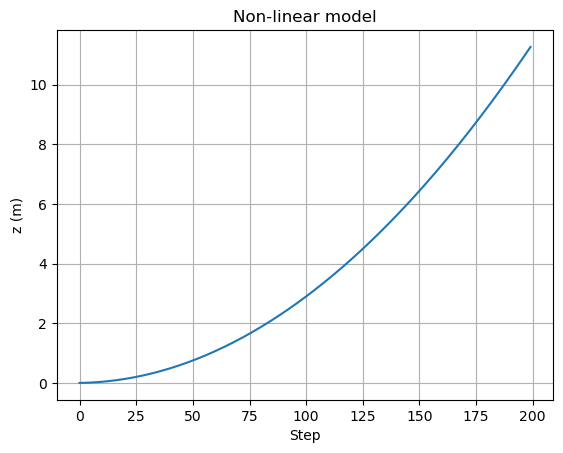

In [29]:
import matplotlib.pyplot as plt
plt.plot(plantStates[2,:],label='z')
plt.ylabel('z (m)')
plt.xlabel('Step')
plt.title('Non-linear model')
plt.grid()
plt.show()

In [1]:
from drone_model import DroneModel
drone = DroneModel(Ts=0.01)

In [2]:
drone.discrete_dynamics([1,0,0,0,0,0,0,0,0,0,0,0],[1,0,0,0])

TypeError: Cannot convert expression to float

In [32]:
modelstates = np.zeros((12,201))
modelstates[:,0] = drone.discrete_dynamics(np.array([1,0,0,0,0,0,0,0,0,0,0,0]),np.array([10,0,0,0]))
for i in range(200):
    modelstates[:,i+1] = drone.discrete_dynamics(modelstates[:,i],np.array([10,0,0,0]))

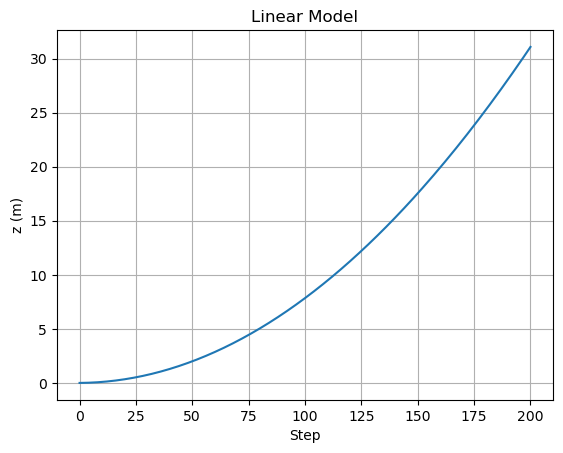

In [33]:
plt.plot(modelstates[2,:],label='z')
plt.ylabel('z (m)')
plt.xlabel('Step')
plt.title('Linear Model')
plt.grid()
plt.show()

In [10]:
drone = NLDroneModel()
drone.integrate_dynamics(np.array([1,0,0,0,0,0,0,0,0,0,0,0]),np.array([1,0.5,0,0]),0.1)

array([ 1.00000000e+00, -4.25687763e-04, -4.13861586e-02,  0.00000000e+00,
       -1.69588913e-02, -8.28854396e-01,  3.33333333e-01,  0.00000000e+00,
        0.00000000e+00,  6.66666667e+00,  0.00000000e+00,  0.00000000e+00])

In [11]:
plantStates = np.zeros((12,200))
for i in range(200):
    plantStates[:,i] = drone.integrate_dynamics(drone.current_state,np.array([1,0,0,0]),0.1)

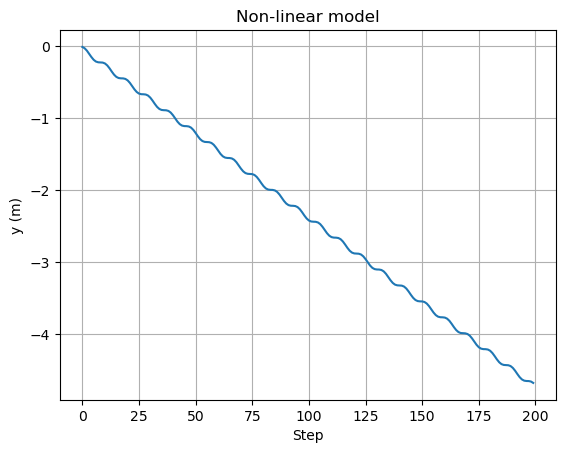

In [12]:
import matplotlib.pyplot as plt
plt.plot(plantStates[1,:],label='x')
plt.ylabel('y (m)')
plt.xlabel('Step')
plt.title('Non-linear model')
plt.grid()
plt.show()

In [13]:
drone = DroneModel(Ts=0.1)

In [14]:
modelstates = np.zeros((12,51))
modelstates[:,0] = drone.discrete_dynamics(np.array([1,0,0,0,0,0,0,0,0,0,0,0]),np.array([1,0.5,0,0]))
for i in range(50):
    modelstates[:,i+1] = drone.discrete_dynamics(modelstates[:,i],np.array([1,0,0,0]))

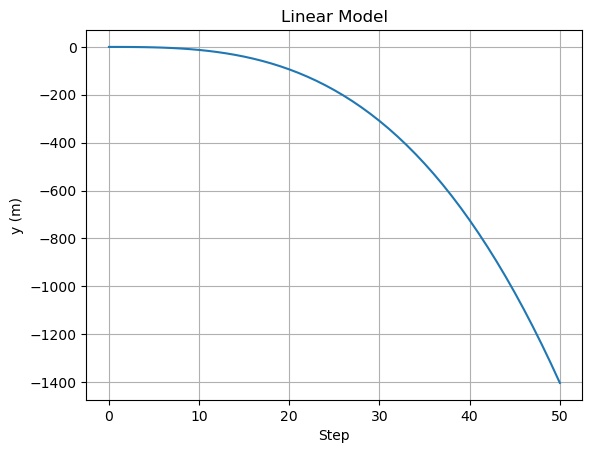

In [15]:
plt.plot(modelstates[1,:],label='y')
plt.ylabel('y (m)')
plt.xlabel('Step')
plt.title('Linear Model')
plt.grid()
plt.show()

In [1]:
import control as ctrl

In [ ]:

ctrl.find_eqpt()

NameError: name 'drone' is not defined

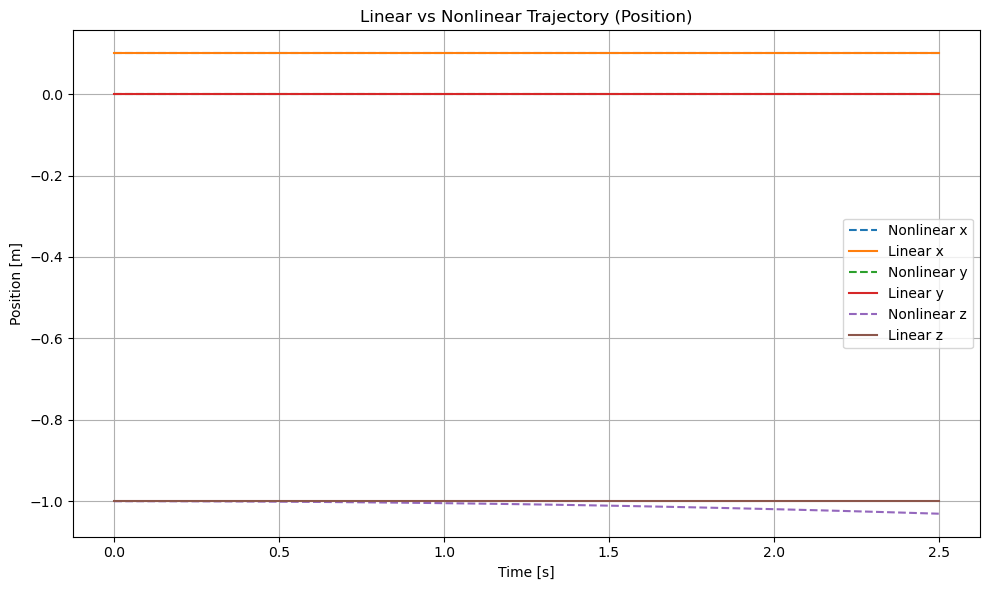

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming these are available:
from drone_model import DroneModel  # for linear model
from nonlinear_drone import NLDroneModel  # for nonlinear model

# Create models
linear_model = DroneModel()
nonlinear_model = NLDroneModel()

# Initial condition near hover
x0 = np.array([0.1, 0.0, -1.0] + [0.0]*9)
u0 = np.array([6.37, 0, 0, 0])

# Linearise around x0, u0
linear_model.computeA(x0)

# Simulate both for N steps
dt = 0.05
N = 50

x_lin = x0.copy()
x_nl = x0.copy()

x_lin_traj = [x_lin.copy()]
x_nl_traj = [x_nl.copy()]
time = [0]

for i in range(N):
    # Linear model: x_k+1 = A(x - x0) + B(u - u0) + x0
    dx = linear_model.A @ (x_lin - x0) + linear_model.B @ (u0 - u0)
    x_lin = x_lin + dx * dt  # Euler step for linear model

    # Nonlinear model
    x_nl = nonlinear_model.integrate_dynamics2(x_nl, u0, dt)

    # Log
    x_lin_traj.append(x_lin.copy())
    x_nl_traj.append(x_nl.copy())
    time.append(time[-1] + dt)

# Convert to arrays
x_lin_traj = np.array(x_lin_traj)
x_nl_traj = np.array(x_nl_traj)
time = np.array(time)

# Plot comparison (example: x, y, z positions)
plt.figure(figsize=(10,6))
labels = ["x", "y", "z"]
for i in range(3):
    plt.plot(time, x_nl_traj[:, i], label=f"Nonlinear {labels[i]}", linestyle='--')
    plt.plot(time, x_lin_traj[:, i], label=f"Linear {labels[i]}")

plt.title("Linear vs Nonlinear Trajectory (Position)")
plt.xlabel("Time [s]")
plt.ylabel("Position [m]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import torch

In [3]:
torch.__version__

'2.6.0+cpu'

c:\Users\Danie\OneDrive - Loughborough University\FinalYearProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


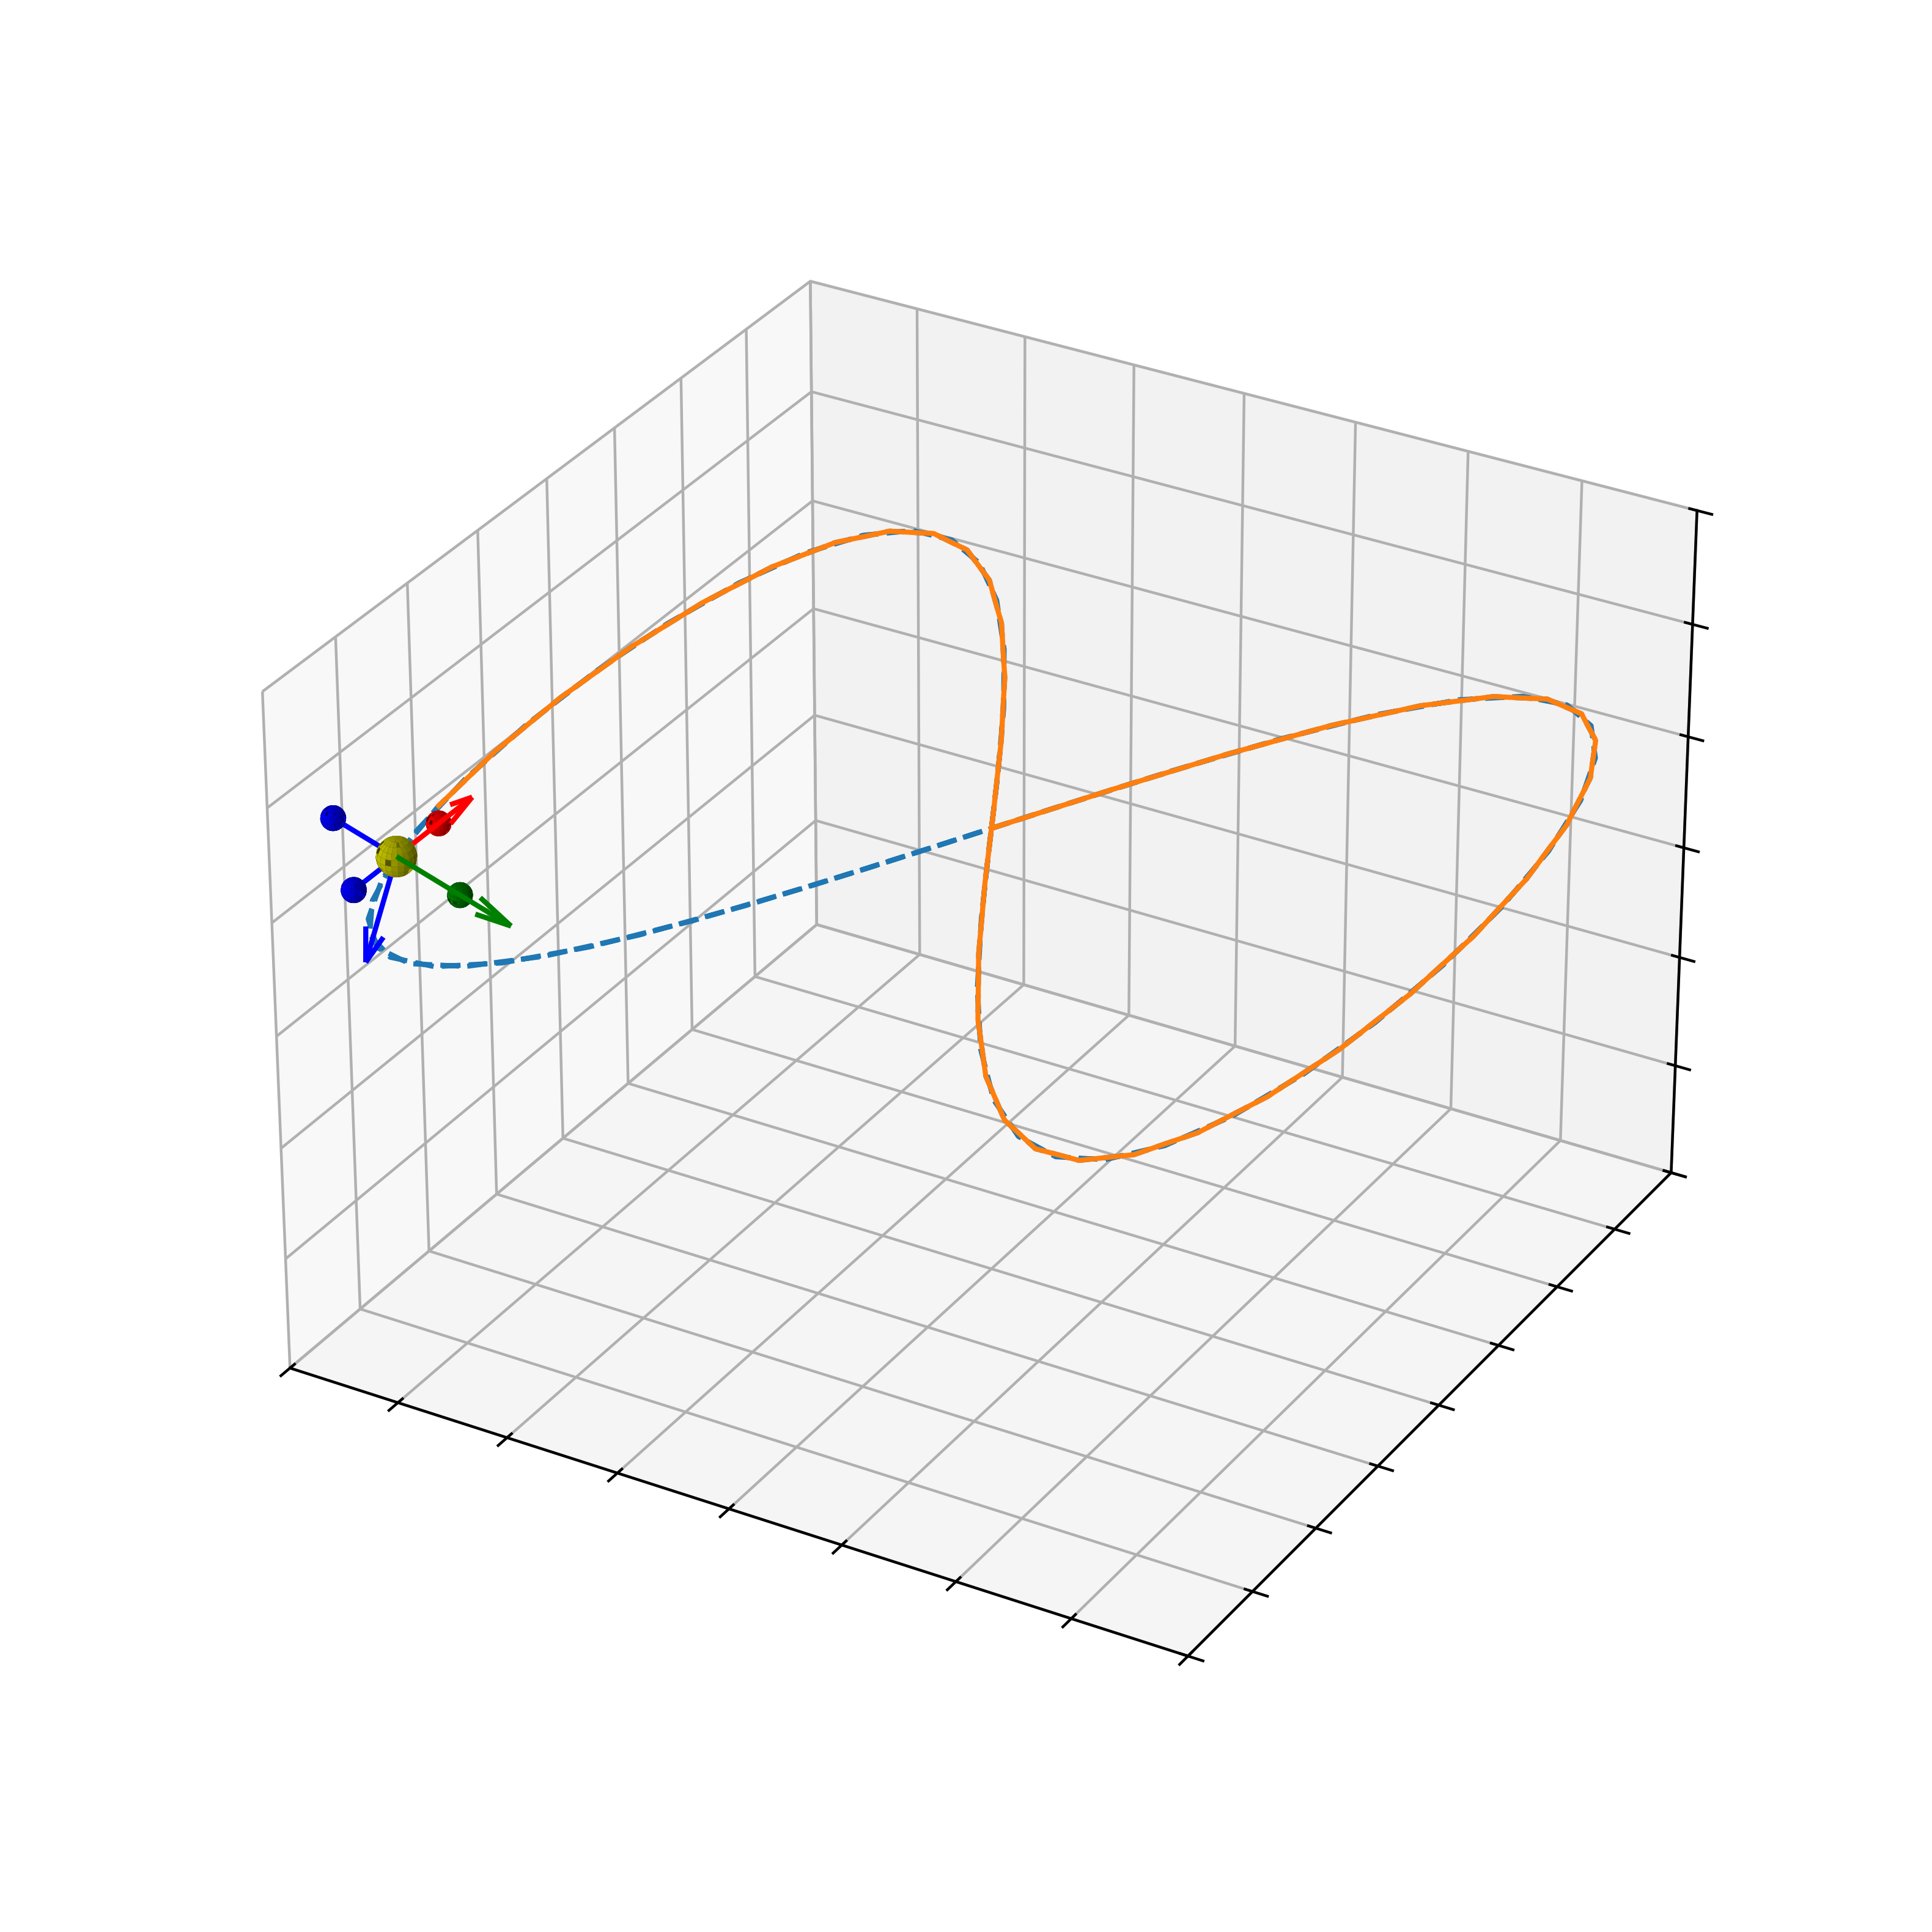

In [47]:
from pyplot3d.uav import Uav
from pyplot3d.utils import ypr_to_R
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.dpi'] = 400

import numpy as np
import matplotlib.pyplot as plt
import trajectory
#plt.style.use('seaborn')

ref = trajectory.figure8(100,0,2)

# Initialize plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


arm_length = 0.3  # in meters
uav = Uav(ax, arm_length)

uav.draw_at([ref[0,-60], ref[1,-60], ref[2,-60]], ypr_to_R([np.pi/2, 0, -np.pi+0.3]))
ax.plot(ref[0,:],ref[1,:],ref[2,:],'--')
ax.plot(ref[0,:-60],ref[1,:-60],ref[2,:-60],'')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 1])
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

#ax.grid(False)
ax.set_box_aspect(None, zoom=0.85)
# Show the plot
plt.show()